In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data1 = pd.read_csv(r'D:\Google Drive\Deep_Learning\Jupiter_Notebooks\ds\Laborales\Log30122019.csv')

data1.describe()



,Well No.,Pressure[Bar],DP[Bar],Temperature[C],Velocity[m/s],Quality,Gamma_Dens[kg/m3],Raw_Dens,WaterCut[%],Xl,...,Cd,diffPress_Input[bar],diffPressZero[bar],ParamFile,PVTFile,Rhog,Rhol,Rhoo,Rhow,ALPHA1
count,31506.0,31506.000000,31506.000000,31506.000000,31506.000000,31506.000000,31506.0,31506.0,31506.000000,31506.000000,...,31505.000000,31505.000000,31505.0,31505.0,31505.0,31505.000000,31505.000000,31505.000000,31505.000000,0.0
mean,1.0,93.954636,0.264933,54.648447,18.161702,0.812319,0.0,0.0,60.038246,0.635829,...,0.955735,0.264933,0.0,51896.0,60305.0,84.259220,818.762841,564.968995,987.407981,NaN
std,0.0,0.671661,0.008398,0.775083,0.266218,0.035967,0.0,0.0,4.435973,0.045412,...,0.000001,0.008398,0.0,0.0,0.0,0.708892,16.535788,0.933616,0.379075,NaN
min,1.0,92.446754,0.181122,49.253258,17.130316,0.651154,0.0,0.0,12.338779,0.168999,...,0.955613,0.181122,0.0,51896.0,60305.0,83.102948,628.672565,562.905718,986.824026,NaN
25%,1.0,93.298584,0.260593,54.265869,18.008853,0.788801,0.0,0.0,60.188196,0.635993,...,0.955735,0.260593,0.0,51896.0,60305.0,83.666948,819.435836,564.321386,987.154436,NaN
50%,1.0,93.941170,0.265196,54.739594,18.163170,0.812846,0.0,0.0,60.579424,0.640869,...,0.955735,0.265196,0.0,51896.0,60305.0,84.152181,820.803389,564.987388,987.357423,NaN
75%,1.0,94.429596,0.269724,55.168968,18.302591,0.842218,0.0,0.0,60.959769,0.645485,...,0.955736,0.269724,0.0,51896.0,60305.0,84.529382,822.149999,565.880855,987.605052,NaN
max,1.0,95.432449,0.338564,55.844276,20.104197,0.922946,0.0,0.0,63.799343,0.703690,...,0.955743,0.338564,0.0,51896.0,60305.0,86.647300,831.803838,567.017624,989.992808,NaN


In [58]:

ds_FP = data1[['Time', 'Pressure[Bar]', 'DP[Bar]', 'Temperature[C]',
       'Velocity[m/s]', 'Quality',
       'WaterCut[%]', 'Xl', 'WWC[%]', 'ch1[nA]', 'ch2[nA]', 'ch3[nA]',
       'ch4[nA]', 'ch5[nA]','TotWLR[%]', 'TotGOR', 'GVF[%]', 'XLM',
       'Frg_dp_out', 'GasDen[kg/m3]', 'GasVisc[cP]', 'Kappa',
       'LiqDen[kg/m3]', 'LiqVisc[cP]',
       ]]

ds_Q = data1[['Time','Pressure[Bar]','Temperature[C]','WaterCut[%]', 'WWC[%]','Qg[m3/s]', 'Ql[m3/s]', 'Qo[m3/s]',
       'Qw[m3/s]', 'QgStd[m3/s]', 'QlStd[m3/s]', 'QoStd[m3/s]', 'QwStd[m3/s]',
       'TotWLR[%]', 'TotGOR', 'GVF[%]']]
              
print(ds_Q.describe())


       Pressure[Bar]  Temperature[C]   WaterCut[%]        WWC[%]  \
count   31506.000000    31506.000000  31506.000000  31506.000000   
mean       93.954636       54.648447     60.038246     60.079130   
std         0.671661        0.775083      4.435973      3.942376   
min        92.446754       49.253258     12.338779     14.657032   
25%        93.298584       54.265869     60.188196     60.254048   
50%        93.941170       54.739594     60.579424     60.555458   
75%        94.429596       55.168968     60.959769     60.884175   
max        95.432449       55.844276     63.799343     63.067654   

           Qg[m3/s]      Ql[m3/s]      Qo[m3/s]      Qw[m3/s]   QgStd[m3/s]  \
count  31506.000000  31506.000000  31506.000000  3.150600e+04  31506.000000   
mean       0.040936      0.003112      0.001235  1.877526e-03      4.042343   
std        0.001335      0.000407      0.000163  2.669133e-04      0.117706   
min        0.010793      0.000005      0.000004  8.258801e-07      1.71

In [59]:
ds_Q[['Pressure[Bar]','Temperature[C]','Qo[m3/s]', 'QoStd[m3/s]']].corr()

,Pressure[Bar],Temperature[C],Qo[m3/s],QoStd[m3/s]
Pressure[Bar],1.000000,0.182166,0.040773,0.017988
Temperature[C],0.182166,1.000000,-0.083272,-0.082481
Qo[m3/s],0.040773,-0.083272,1.000000,0.999723
QoStd[m3/s],0.017988,-0.082481,0.999723,1.000000


In [60]:
#adding columns with 24hs rates

ds_Q[["Qg[m3/d]"]] = ds_Q[["Qg[m3/s]"]] * 86400
ds_Q[["Ql[m3/d]"]] = ds_Q[["Ql[m3/s]"]] * 86400
ds_Q[["Qo[m3/d]"]] = ds_Q[["Qo[m3/s]"]] * 86400
ds_Q[["Qw[m3/d]"]] = ds_Q[["Qw[m3/s]"]] * 86400
ds_Q[["QgStd[m3/d]"]] = ds_Q[["QgStd[m3/s]"]] * 86400
ds_Q[["QlStd[m3/d]"]] = ds_Q[["QlStd[m3/s]"]] * 86400
ds_Q[["QoStd[m3/d]"]] = ds_Q[["QoStd[m3/s]"]] * 86400
ds_Q[["QwStd[m3/d]"]] = ds_Q[["QwStd[m3/s]"]] * 86400


In [61]:
ds_Q.columns


Index(['Time', 'Pressure[Bar]', 'Temperature[C]', 'WaterCut[%]', 'WWC[%]',
       'Qg[m3/s]', 'Ql[m3/s]', 'Qo[m3/s]', 'Qw[m3/s]', 'QgStd[m3/s]',
       'QlStd[m3/s]', 'QoStd[m3/s]', 'QwStd[m3/s]', 'TotWLR[%]', 'TotGOR',
       'GVF[%]', 'Qg[m3/d]', 'Ql[m3/d]', 'Qo[m3/d]', 'Qw[m3/d]', 'QgStd[m3/d]',
       'QlStd[m3/d]', 'QoStd[m3/d]', 'QwStd[m3/d]'],
      dtype='object')

In [62]:
to_drop = ['Qg[m3/s]', 'Ql[m3/s]', 'Qo[m3/s]',
       'Qw[m3/s]', 'QgStd[m3/s]', 'QlStd[m3/s]', 'QoStd[m3/s]', 'QwStd[m3/s]',
       'TotGOR', 'GVF[%]']
ds_Qf= ds_Q.drop(to_drop, axis=1)


ds_Qf.describe()

,Pressure[Bar],Temperature[C],WaterCut[%],WWC[%],TotWLR[%],Qg[m3/d],Ql[m3/d],Qo[m3/d],Qw[m3/d],QgStd[m3/d],QlStd[m3/d],QoStd[m3/d],QwStd[m3/d]
count,31506.000000,31506.000000,31506.000000,31506.000000,31506.000000,31506.000000,31506.000000,31506.000000,31506.000000,31506.000000,31506.000000,31506.000000,31506.000000
mean,93.954636,54.648447,60.038246,60.079130,81.305651,3536.827317,268.901639,106.683385,162.218254,349258.423972,197.154402,36.836466,160.317936
std,0.671661,0.775083,4.435973,3.942376,0.655071,115.348710,35.162309,14.066843,23.061310,10169.810222,26.753432,4.851168,22.789362
min,92.446754,49.253258,12.338779,14.657032,0.000000,932.480443,0.427425,0.356069,0.071356,148137.365894,0.193511,0.122902,0.070609
25%,93.298584,54.265869,60.188196,60.254048,81.288132,3472.303405,250.983167,99.064613,151.629054,343617.064699,184.097549,34.200433,149.855915
50%,93.941170,54.739594,60.579424,60.555458,81.306203,3533.172572,269.881864,106.525478,163.302415,348675.070134,198.132148,36.778480,161.378146
75%,94.429596,55.168968,60.959769,60.884175,81.333064,3592.123219,289.208857,114.209780,175.145787,353814.321953,212.414672,39.453973,173.081459
max,95.432449,55.844276,63.799343,63.067654,81.782990,4430.587443,1238.526466,962.556893,284.570471,431658.204221,605.279770,332.309958,281.079878


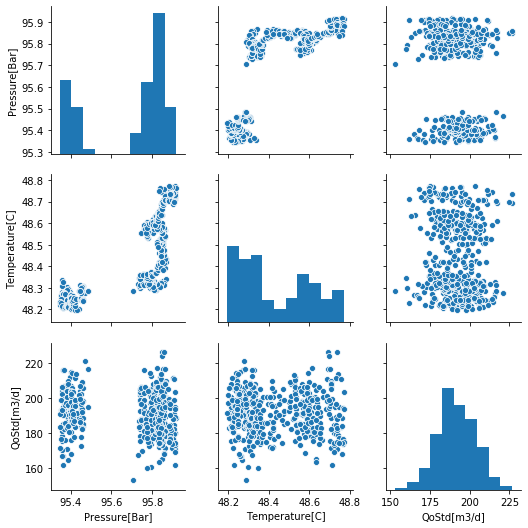

In [13]:
sns.pairplot(ds_Qf[['Pressure[Bar]', 'Temperature[C]','QoStd[m3/d]']], diag_kind="hist")

In [63]:
ds_Qf.describe().to_csv('D:\Google Drive\Deep_Learning\Jupiter_Notebooks\ds\Laborales\ds_Qf.csv')

In [40]:
ds_Qf.columns


Index(['Time', 'Pressure[Bar]', 'Temperature[C]', 'WaterCut[%]', 'WWC[%]',
       'TotWLR[%]', 'Qg[m3/d]', 'Ql[m3/d]', 'Qo[m3/d]', 'Qw[m3/d]',
       'QgStd[m3/d]', 'QlStd[m3/d]', 'QoStd[m3/d]', 'QwStd[m3/d]'],
      dtype='object')

In [7]:
ds2_Qf.describe().to_csv('D:\Google Drive\Deep_Learning\Jupiter_Notebooks\ds\Laborales\ds2_Qf.csv')


[Text(0.5, 1.0, 'Pressure chart')]

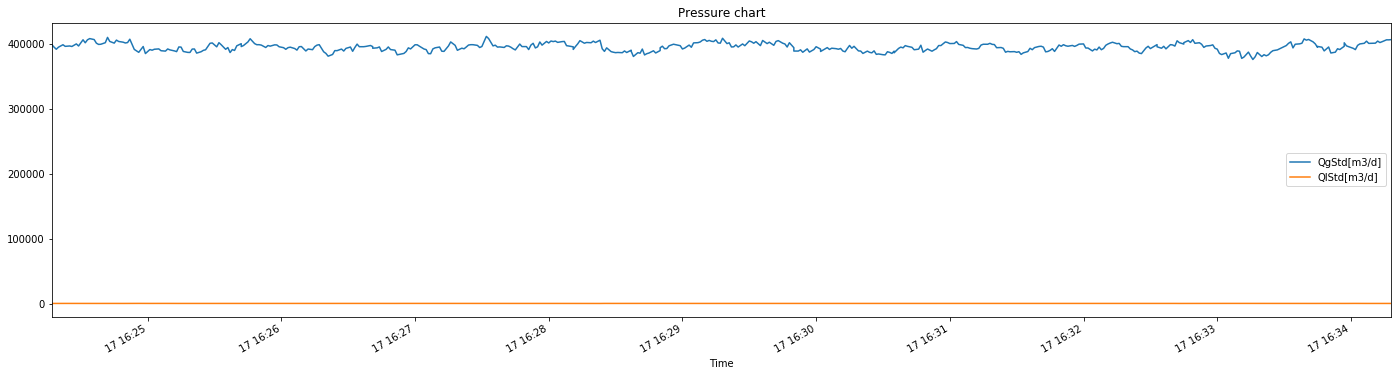

In [54]:
ds_Qf['Time'] = pd.to_datetime(ds_Qf['Time'])
#ds_Qf.dtypes
fig, ax = plt.subplots(figsize=(24,6))
ds_Qf.plot(x='Time', y=['QgStd[m3/d]', 'QlStd[m3/d]'], ax=ax)
ax.set(title="Pressure chart")